In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("../car_price_prediction_model/US_Car_Data.csv", nrows=1000)

In [3]:
# data analysis

In [4]:
dataset.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [5]:
dataset.shape

(1000, 8)

In [6]:
print(dataset["Color"].unique())
print(dataset["Condition"].unique())
print(dataset["Brand"].unique())

['Blue' 'Silver' 'Green' 'Black' 'Red' 'White']
['New' 'Used']
['Mazda' 'Jaguar' 'Land Rover' 'Porsche' 'Volvo' 'Chevrolet' 'Ford'
 'Hyundai' 'Tesla' 'Lexus' 'Mercedes-Benz' 'Subaru' 'Volkswagen' 'Audi'
 'Honda' 'Jeep' 'BMW' 'Nissan' 'Kia' 'Toyota']


In [7]:
dataset.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [8]:
dataset.describe()

,ID,Year,Mileage,Price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2005.395000,101471.551000,42969.496000
std,288.819436,9.563704,58801.374396,22163.859014
min,1.000000,1990.000000,5.000000,5029.000000
25%,250.750000,1997.000000,49812.750000,23142.250000
50%,500.500000,2005.000000,103188.500000,43557.500000
75%,750.250000,2014.000000,153937.250000,63042.250000
max,1000.000000,2022.000000,199928.000000,79958.000000


In [9]:
dataset.columns

Index(['ID', 'Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price',
       'Condition'],
      dtype='object')

In [10]:
final_data = dataset[["Price", "Year", "Color", "Mileage", "Condition"]]

In [11]:
final_data.head()

,Price,Year,Color,Mileage,Condition
0,65732,2003,Blue,22932,New
1,58620,2003,Silver,89937,New
2,50574,2022,Green,36616,New
3,35436,1997,Black,82812,Used
4,63880,2000,Black,184616,Used


In [12]:
final_data['Current_year'] = 2024

/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/215224835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Current_year'] = 2024


In [13]:
final_data["Num_of_yrs_old"] = final_data["Current_year"] - final_data["Year"]

/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/4004495856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["Num_of_yrs_old"] = final_data["Current_year"] - final_data["Year"]


In [14]:
final_data.head()

,Price,Year,Color,Mileage,Condition,Current_year,Num_of_yrs_old
0,65732,2003,Blue,22932,New,2024,21
1,58620,2003,Silver,89937,New,2024,21
2,50574,2022,Green,36616,New,2024,2
3,35436,1997,Black,82812,Used,2024,27
4,63880,2000,Black,184616,Used,2024,24


In [15]:
final_data.drop(["Year", "Current_year"], axis = 1, inplace=True)

/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/2327493568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop(["Year", "Current_year"], axis = 1, inplace=True)


In [16]:
final_data.replace({"Condition":{"Used":0, "New":1}}, inplace = True)
final_data.replace({"Color":{"Blue":0, "Green":1, "Silver":2, "White":3,"Black":4, "Red":5}}, inplace = True)
final_data.head()

/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/1398210675.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data.replace({"Condition":{"Used":0, "New":1}}, inplace = True)
/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/1398210675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.replace({"Condition":{"Used":0, "New":1}}, inplace = True)
/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/1398210675.py:2: FutureWarning: Downcasting behavior in `replac

,Price,Color,Mileage,Condition,Num_of_yrs_old
0,65732,0,22932,1,21
1,58620,2,89937,1,21
2,50574,1,36616,1,2
3,35436,4,82812,0,27
4,63880,4,184616,0,24


In [17]:
final_data.corr()

,Price,Color,Mileage,Condition,Num_of_yrs_old
Price,1.000000,0.024495,-0.004257,0.006462,0.022787
Color,0.024495,1.000000,0.059479,-0.024796,0.049173
Mileage,-0.004257,0.059479,1.000000,-0.021782,-0.028311
Condition,0.006462,-0.024796,-0.021782,1.000000,-0.014206
Num_of_yrs_old,0.022787,0.049173,-0.028311,-0.014206,1.000000


In [18]:
final_data.head()

,Price,Color,Mileage,Condition,Num_of_yrs_old
0,65732,0,22932,1,21
1,58620,2,89937,1,21
2,50574,1,36616,1,2
3,35436,4,82812,0,27
4,63880,4,184616,0,24


In [19]:
#Independant and Dependent features
X=final_data.iloc[:,1:]
Y=final_data.iloc[:,0]
X.head()

,Color,Mileage,Condition,Num_of_yrs_old
0,0,22932,1,21
1,2,89937,1,21
2,1,36616,1,2
3,4,82812,0,27
4,4,184616,0,24


In [20]:
Y.head()

0    65732
1    58620
2    50574
3    35436
4    63880
Name: Price, dtype: int64

In [21]:
#Feature Importance
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X,Y)

ExtraTreesRegressor()

In [22]:
print(ETR.feature_importances_)

[0.12528634 0.49687985 0.05289908 0.32493473]


In [23]:
#plot graph of features importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

NameError: name 'model' is not defined

In [24]:
#Train and test

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [26]:
X_train.shape

(800, 4)

In [27]:
# Uploading model
from sklearn.ensemble import RandomForestRegressor
rfr_random=RandomForestRegressor()

In [28]:
#hyperparameters and Randomized CV search
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#No of decision trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# No of features to consider at every split 
max_features = ['auto', 'sqrt']

#Maximum no. of levels in the tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#max_depth.append(None)
#Minimum no. of samples required to split a node 
min_samples_split = [2, 5, 10, 15, 100]

#Minimum no. of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [29]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr = RandomForestRegressor()

In [31]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [32]:
rfr_random.fit(X_train, Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/opt/anaconda3/envs/Car_price_predicition/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Car_price_predicition/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/Car_price_predicition/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/Car_price_predicition/lib/python3.12/site-packages/sklearn/base.py", line 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
rfr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [34]:
rfr_random.best_score_

-504702558.41844624

In [36]:
predictions = rfr_random.predict(X_test)

In [37]:
predictions

array([45313.17804596, 46288.61391593, 43997.5387579 , 40426.50571247,
       39533.4042478 , 45098.86567705, 46549.40591335, 45546.2426257 ,
       40638.61525378, 38517.73064574, 48427.86709908, 42026.15359598,
       45232.07913993, 45010.32100452, 44842.51550321, 41995.17983313,
       40439.21638044, 44917.22287751, 44042.35015121, 45279.14546289,
       45799.7290522 , 44453.1363378 , 45738.21434348, 44991.08343984,
       41714.36477748, 43464.92318557, 40570.4901466 , 44724.12849248,
       44286.63446537, 40953.62014505, 43387.75810397, 42707.7841327 ,
       45330.58982065, 41126.03325637, 45546.8081207 , 46104.74260603,
       41701.03538776, 42888.26419647, 44120.16676977, 45831.37760954,
       45520.63148626, 44341.10594656, 44508.78065531, 42537.30474836,
       44508.4090251 , 45162.6682586 , 41126.03552985, 41804.72346613,
       46120.01876554, 41971.68658076, 36625.20682994, 45024.3860908 ,
       43426.25760694, 36679.53051284, 44964.49935399, 41217.26008201,
      

/var/folders/5f/l284qlxs2p53h_z7t5mjjsph0000gn/T/ipykernel_12102/1810383995.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test - predictions)


<Axes: xlabel='Price', ylabel='Density'>

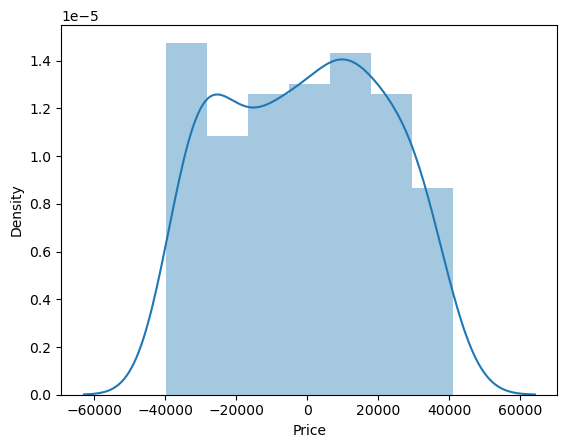

In [38]:
import seaborn as sns
sns.distplot(Y_test - predictions)

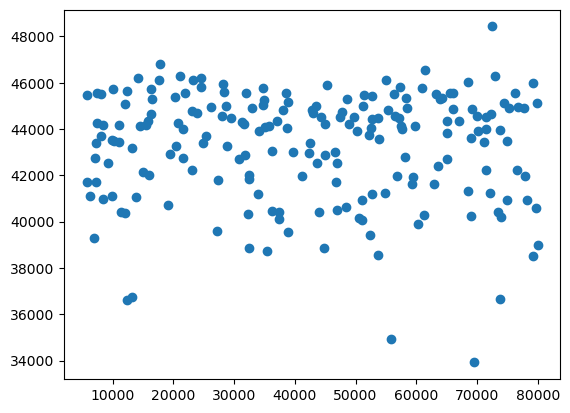

In [39]:
plt.scatter(Y_test,predictions)

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 19186.53216226131
MSE: 494291512.1963152
RMSE: 22232.667680607185


In [41]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr_random, file)